[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/12RFZqVdDeo5bnU_QUggkTb8FlrAdWtZL?usp=sharing)

## Import Libraries

In [173]:
import numpy as np    # linear algebra
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
sns.set(style = 'white')

# Input data files are available in the "../churn_prediction" directory.

import os
print(os.listdir("../churn_prediction"))

# Any results we write to the current directory are saved as output.

['churn.png', 'par.png', 'kde4.png', '.ipynb_checkpoints', 'kde.png', 'dist.png', 'inp.png', 'kde3.png', 'kde1.png', 'Untitled.ipynb', 'kde2.png', 'WA_Fn-UseC_-Telco-Customer-Churn.csv']


In [64]:
# loading dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [65]:
# Shape 
df.shape

(7043, 21)

## Metadata info

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [67]:
# Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

# Passed a dictionary to astype() function  
df = df.astype({"customerID":'category',
                "gender":'category',
                "SeniorCitizen":'category',
                "Partner":'category',
                "Dependents":'category',
                "tenure":'float64',
                "PhoneService":'category',
                "MultipleLines":'category',
                "InternetService":'category',
                "OnlineSecurity":'category',
                "OnlineBackup":'category',
                "DeviceProtection":'category',
                "TechSupport":'category',
                "StreamingTV":'category',
                "StreamingMovies":'category',
                "Contract":'category',
                "PaperlessBilling":'category',
                "PaymentMethod":'category',
                "MonthlyCharges": 'float64',
                #"TotalCharges": 'float64'
               }) 

In [68]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

## Attributes Information
<h4>Prediction column: <br><br>
    Churn : Whether the customer churned or not (Yes or No)
</h4>

<h4>Two numerical columns: <br><br>
    1. MonthlyCharges : The amount charged to the customer monthly <br><br>
    2. TotalCharges : The total amount charged to the customer <br>
</h4>

<h4>Eighteen categorical columns:
    1. customerID : Customer ID unique for each customer <br><br>
    2. gender : Whether the customer is a male or a female <br><br>
    3. SeniorCitizen : Whether the customer is a senior citizen or not (1, 0) <br><br>
    4. Partner : Whether the customer has a partner or not (Yes, No) <br><br>
    5. Dependents : Whether the customer has dependents or not (Yes, No) <br><br>
    6. Tenure : Number of months the customer has stayed with the company <br><br>
    7. PhoneService : Whether the customer has a phone service or not (Yes, No) <br><br>
    8. MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service) <br><br>
    9. InternetService : Customer’s internet service provider (DSL, Fiber optic, No) <br><br>
    10. OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service) <br><br>
    11. OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service) <br><br>
    12. DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service) <br><br>
    13. TechSupport : Whether the customer has tech support or not (Yes, No, No internet service) <br><br>
    14. StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service) <br><br>
    15. StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service) <br><br>
    16. Contract : The contract term of the customer (Month-to-month, One year, Two year) <br><br>
    17. PaperlessBilling : Whether the customer has paperless billing or not (Yes, No) <br><br>
    18. PaymentMethod :  The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
</h4>

## Dealing with Null values

In [69]:
# Checking if it contain null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [70]:
# Percentage of null values
df.isnull().sum() * 100 / len(df)

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

After looking at the above output, we can say that there are 11 missing values which is ony 0.15% of total values for Total Charges. 
So we can fill it with simple mean imputation  our data set

In [71]:
# fill missing values with mean column values
df.TotalCharges.fillna(df.TotalCharges.mean(), inplace=True)

## Exploratory Data Analysis

### Check for Imbalance class distribution in Prediction column

<h4>We are trying to predict if the client left the company in the previous month. Therefore we have a binary classification problem with a slightly unbalanced target:
<br><br>
<li> Churn: No - 72.4% </li><br>
<li> Churn: Yes - 27.6%</li>
</h4>

In [72]:
# Class Distribution
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

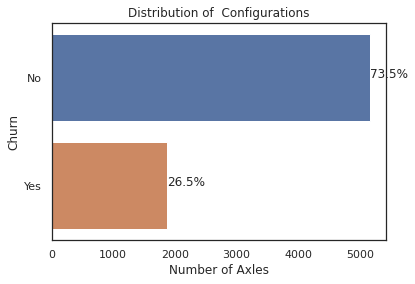

In [74]:
def bar_plot(df,column):    
    ax = sns.countplot(y=column, data=df)
    plt.title('Distribution of  Configurations')
    plt.xlabel('Number of Axles')

    total = len(df[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    plt.show()
bar_plot(df, "Churn")

### Numerical features
There are only three numerical columns: tenure, monthly charges and total charges. 

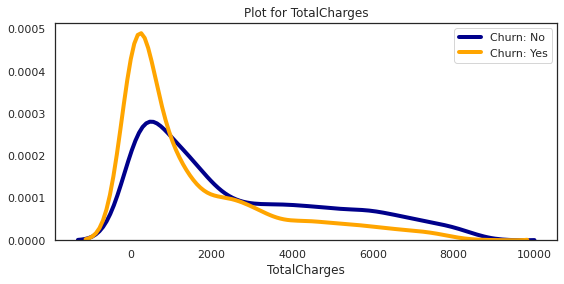

In [96]:
def kdeplot(feature, hist, kde):
    plt.figure(figsize=(9, 4))
    plt.title("Plot for {}".format(feature))
    ax0 = sns.distplot(df[df['Churn'] == 'No'][feature].dropna(), hist=hist, kde=kde, 
             color = 'darkblue',  label= 'Churn: No',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    ax1 = sns.distplot(df[df['Churn'] == 'Yes'][feature].dropna(), hist=hist, kde=kde, 
             color = 'orange',  label= 'Churn: Yes',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
kdeplot('tenure', hist = False, kde = True)
kdeplot('MonthlyCharges', hist = False, kde = True)
kdeplot('TotalCharges', hist = False, kde = True)


From the plots above we can conclude that:

* Recent Users are more likely to churn
* Users with higher MonthlyCharges are also more likely to churn
* TotalCharges have similar property for both

#### Histogram

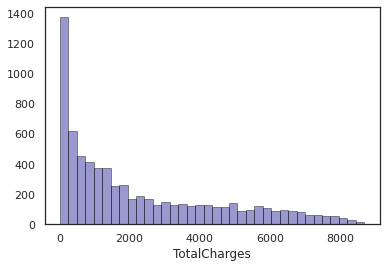

In [98]:
# Density Plot and Histogram of all arrival delays
sns.distplot(df['TotalCharges'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

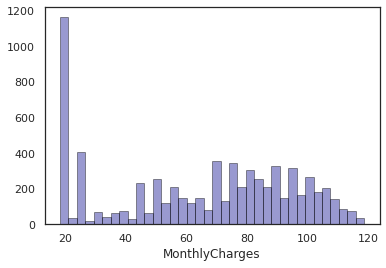

In [99]:
# Density Plot and Histogram of all arrival delays
sns.distplot(df['MonthlyCharges'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

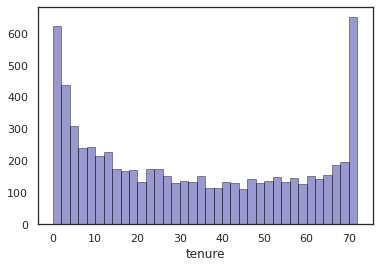

In [100]:
# Density Plot and Histogram of all arrival delays
sns.distplot(df['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

#### Pairplot

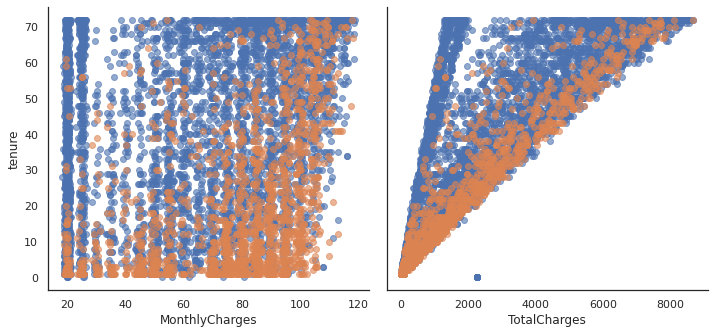

In [101]:
g = sns.PairGrid(df, y_vars=["tenure"], x_vars=["MonthlyCharges", "TotalCharges"], height=4.5, hue="Churn", aspect=1.1)
ax = g.map(plt.scatter, alpha=0.6)

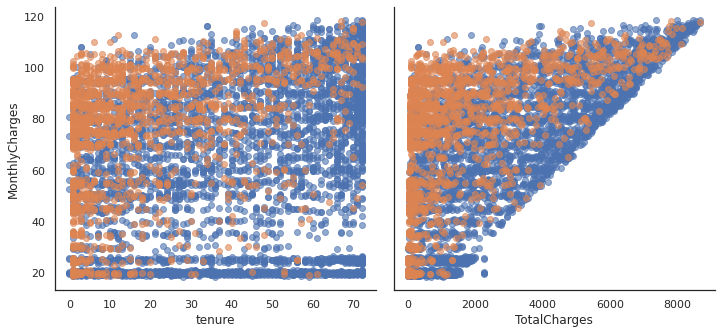

In [102]:
g = sns.PairGrid(df, y_vars=["MonthlyCharges"], x_vars=["tenure", "TotalCharges"], height=4.5, hue="Churn", aspect=1.1)
ax = g.map(plt.scatter, alpha=0.6)

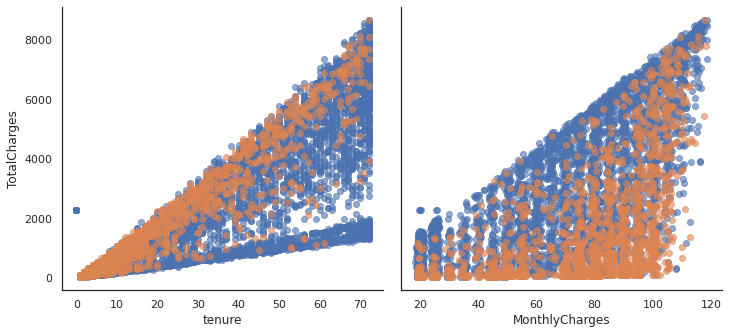

In [103]:
g = sns.PairGrid(df, y_vars=["TotalCharges"], x_vars=["tenure", "MonthlyCharges"], height=4.5, hue="Churn", aspect=1.1)
ax = g.map(plt.scatter, alpha=0.6)

/home/bharat/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/bharat/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


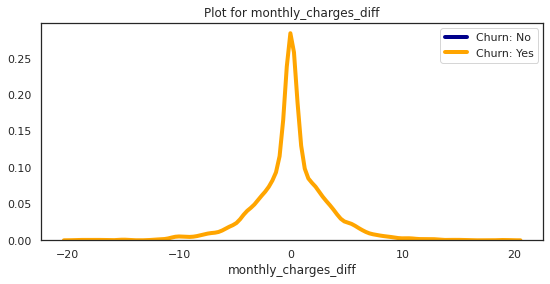

In [115]:
# Calculate features
df['total_charges_to_tenure_ratio'] = df['TotalCharges'] / df['tenure']
df['monthly_charges_diff'] = df['MonthlyCharges'] - df['total_charges_to_tenure_ratio']
kdeplot('monthly_charges_diff', kde = True, hist = False)
plt.savefig('kde4.png')

### Categorical features
This dataset has 16 categorical features:

* Six binary features (Yes/No)
* Nine features with three unique values each (categories)
* One feature with four unique values

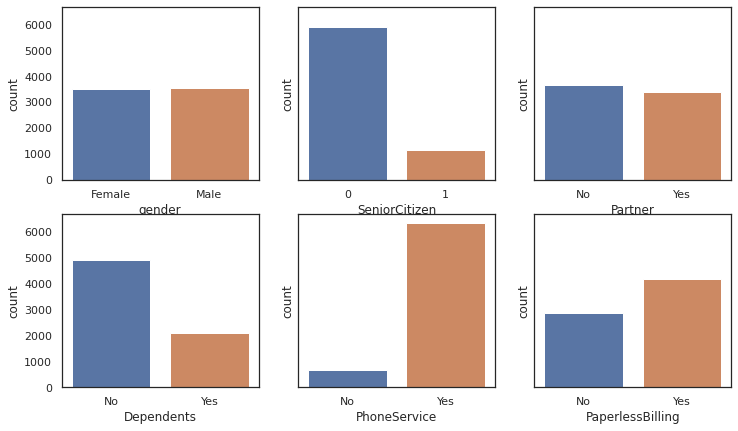

In [116]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("gender", data=df, ax=axes[0,0])
sns.countplot("SeniorCitizen", data=df, ax=axes[0,1])
sns.countplot("Partner", data=df, ax=axes[0,2])
sns.countplot("Dependents", data=df, ax=axes[1,0])
sns.countplot("PhoneService", data=df, ax=axes[1,1])
sns.countplot("PaperlessBilling", data=df, ax=axes[1,2])
fig.savefig("inp.png")

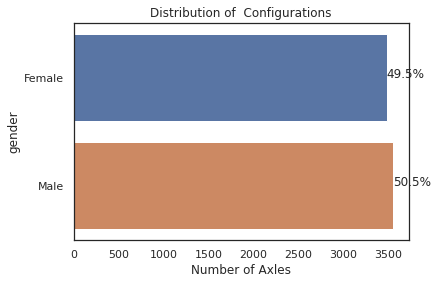

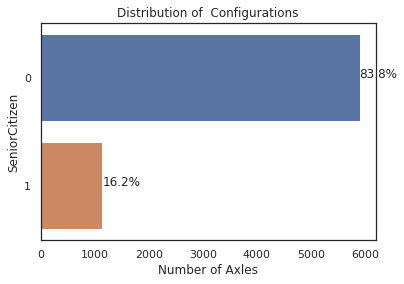

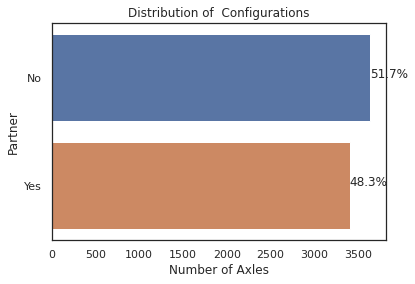

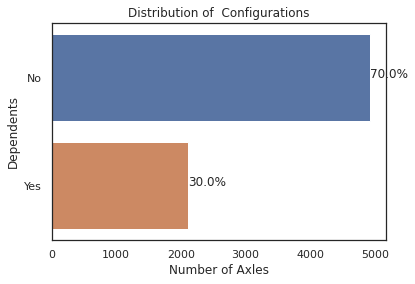

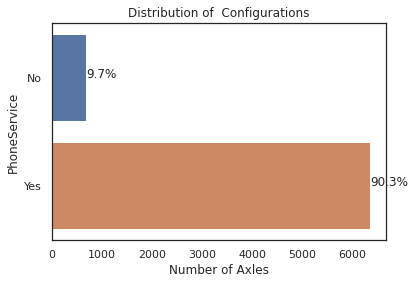

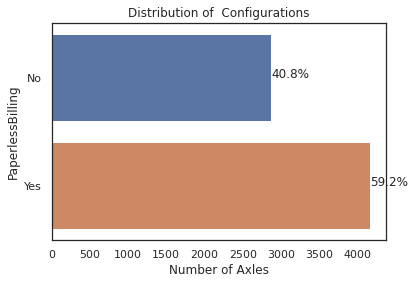

<Figure size 432x288 with 0 Axes>

In [119]:
bar_plot(df, "gender")
bar_plot(df, "SeniorCitizen")
bar_plot(df, "Partner")
bar_plot(df, "Dependents")
bar_plot(df, "PhoneService")
bar_plot(df, "PaperlessBilling")

### Partner and Dependents

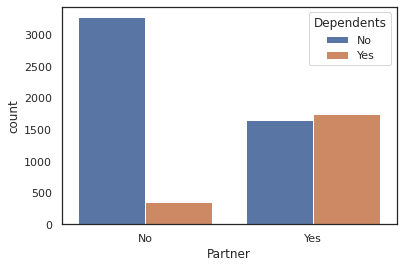

In [123]:
sns.countplot("Partner", data=df, hue = 'Dependents')

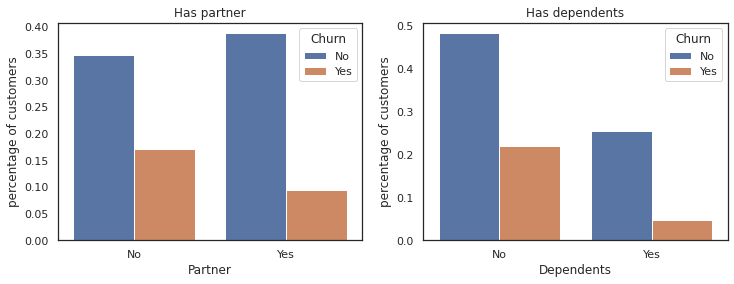

In [121]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
# Plot Partner column
gp_partner = df.groupby('Partner')["Churn"].value_counts()/len(df)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = df.groupby('Dependents')["Churn"].value_counts()/len(df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])
fig.savefig('par.png')

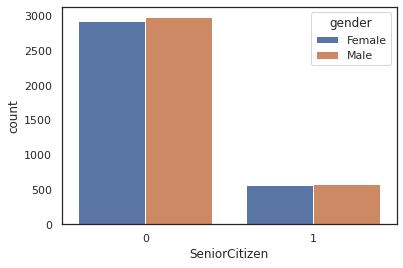

In [125]:
sns.countplot("SeniorCitizen", data=df, hue = 'gender')

### Senior Citizen and Dependent

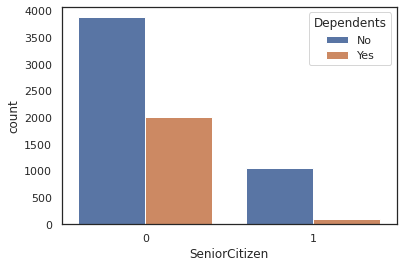

In [127]:
sns.countplot("SeniorCitizen", data=df, hue = 'Dependents')
fig

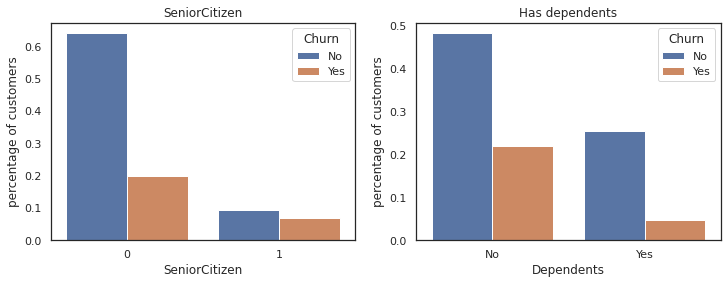

In [128]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("SeniorCitizen")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
# Plot Partner column
gp_partner = df.groupby('SeniorCitizen')["Churn"].value_counts()/len(df)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='SeniorCitizen', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = df.groupby('Dependents')["Churn"].value_counts()/len(df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])
fig.savefig('par.png')

### Phone and Internet services

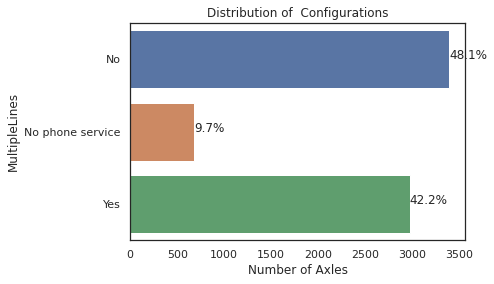

In [129]:
bar_plot(df, "MultipleLines")

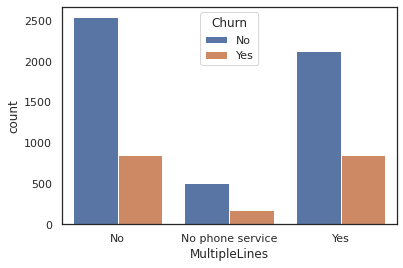

In [131]:
sns.countplot("MultipleLines", data=df, hue = 'Churn')

* Few customers doesn't have phone service
* Customers with multiple lines have a slightly higher churn rate

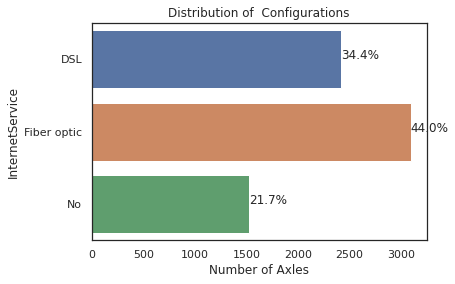

In [135]:
bar_plot(df, "InternetService")

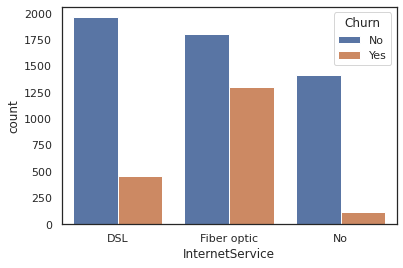

In [136]:
sns.countplot("InternetService", data=df, hue = 'Churn')

* Customers without internet have a very low churn rate
* Customers with fiber are more probable to churn than those with DSL connection

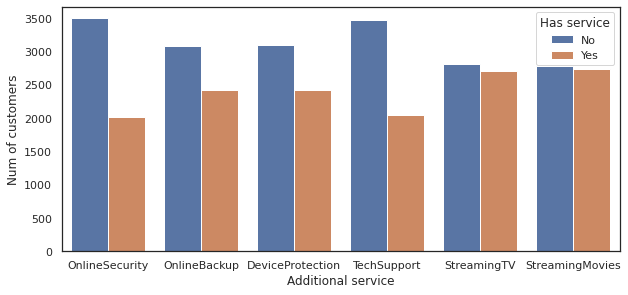

In [137]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

### Payment Method

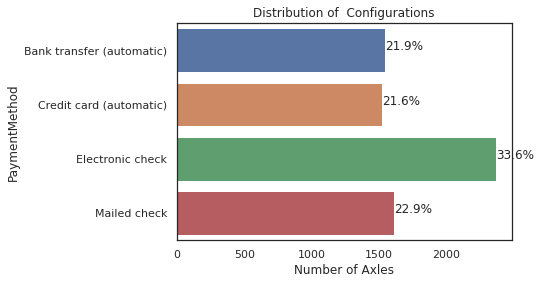

In [139]:
bar_plot(df, "PaymentMethod")

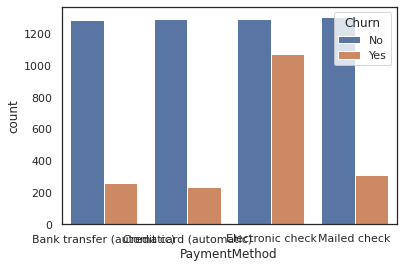

In [138]:
sns.countplot("PaymentMethod", data=df, hue = 'Churn')

## Correlation between features

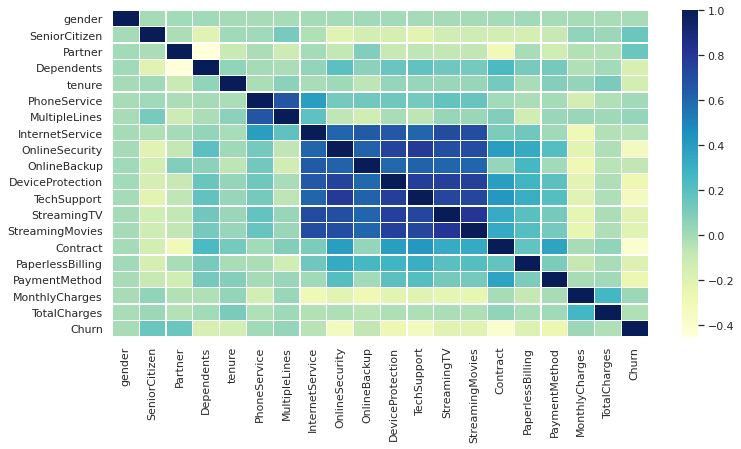

In [150]:
plt.figure(figsize=(12, 6))
df.drop(['customerID', 'total_charges_to_tenure_ratio', 'monthly_charges_diff'],
        axis=1, inplace=True)
df_corr = df.apply(lambda x: pd.factorize(x)[0])
ax = sns.heatmap(df_corr.corr(), xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

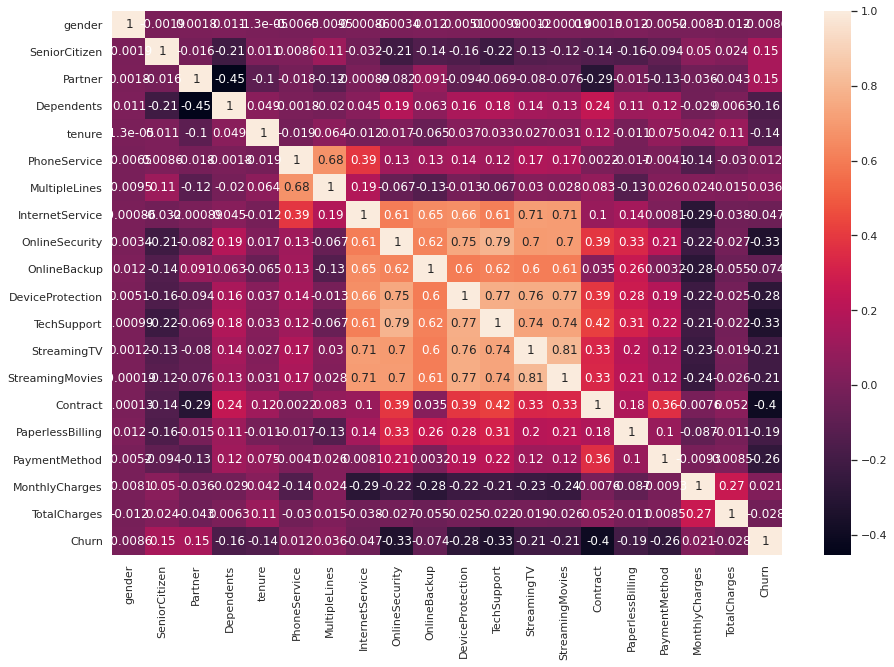

In [152]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_corr.corr(), annot=True)

## Feature Importance

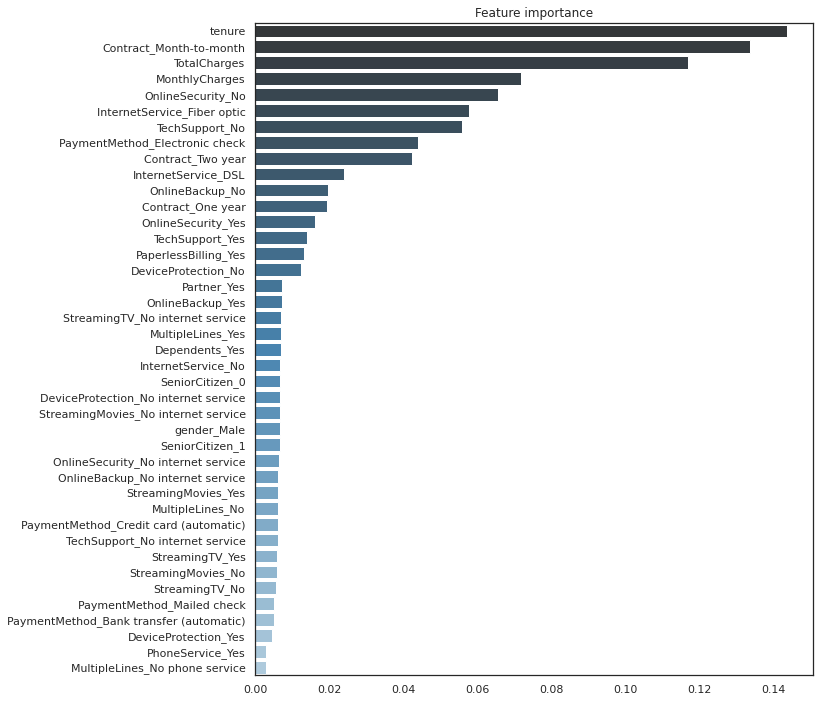

In [155]:
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
# One-hot encode
df = pd.get_dummies(df)
# Drop redundant columns (for features with two unique values)
drop = ['Churn_Yes', 'Churn_No', 'gender_Female', 'Partner_No',
        'Dependents_No', 'PhoneService_No', 'PaperlessBilling_No']
x, y = df.drop(drop,axis=1), df['Churn_Yes']
# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

## Oversampling Technique
Synthetic Minority Oversampling Technique(SMOTE) is an oversampling technique and widely used to handle the imbalanced dataset.<br> This technique synthesizes new data points for minority class and oversample that class.

In [159]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_resampled, y_resampled = sm.fit_resample(x, y)

In [162]:
y_resampled.value_counts()

1    5174
0    5174
Name: Churn_Yes, dtype: int64

## Train Test Splits
Divides data into Train and Test Subset

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state=42)

## Model
For Starter GradientBoostingClassifier model is implemented to show to results of basic model and its predictions.

In [170]:
clf_forest = GradientBoostingClassifier()
clf_forest.fit(X_train, y_train)

GradientBoostingClassifier()

Model prediction on training dataset

In [171]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.8659096400096642

Model prediction in testing dataset

In [172]:
pred_test = clf_forest.predict(X_test)
accuracy_score(y_test, pred_test)

0.855072463768116

## Confusion Martrix

In [175]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
# predicted values
predicted = pred_test

# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[906 143]
 [157 864]]
Outcome values : 
 906 143 157 864
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.86      0.86      1049
           0       0.86      0.85      0.85      1021

    accuracy                           0.86      2070
   macro avg       0.86      0.85      0.86      2070
weighted avg       0.86      0.86      0.86      2070



## Evaluation

In [178]:
y_true = y_test
y_pred = pred_test
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)


array([[864, 157],
       [143, 906]])

In [179]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)


0.855072463768116

In [180]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_true, y_pred, average=None)


array([0.84622919, 0.86367969])

In [181]:
# Precision
from sklearn.metrics import precision_score
precision_score(y_true, y_pred, average=None)

array([0.85799404, 0.8523048 ])

In [182]:
# F1 Score
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average=None)

array([0.85207101, 0.85795455])